# Time series Analysis using Neural Networks (LSTM)
## Crime forecast based on the temparature

Import the libraries
pandas - Pandas is a data analysis library in Python. This library provides tools for high performance data cleaning and manipulation of datasets for applying machine learning algorithms.

matplotlib - Matplotlib is a 2D plotting library in Python. It provides good quality figures in a variety formats and interactive environments.

sklearn - Scikit-Learn is a library with Machine Learnign algorithms for regression, classification and clustering problems. It is built on numerical and science libraries NumPy and SciPy.

keras - Keras is a deep learning library in Python. It is used to preprocess data, train model, evaluate and optimize neural networks. It uses tensorflow which is a open source deep learning library from google as the backend.

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from datetime import datetime, date, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import concatenate
from math import sqrt
from scipy import stats

Using TensorFlow backend.


Import the preprocessed (cleaned) crime data from the csv file to a pandas data frame
While importing convert the date from string to datetime format and set it as index column.

In [2]:
def dtparser(x):
    return datetime.strptime(x, '%m/%d/%Y')

dfCrime = pd.read_csv('data/final_crime_data.csv', header=0, parse_dates = {'CrimeDate': ['Date.Occurred']}, index_col='CrimeDate', date_parser=dtparser)

print(dfCrime.head())
print(dfCrime.shape)

            Time.Occurred  Area.Name       Crime.Type  Longitude  Latitude  \
CrimeDate                                                                    
2010-01-01              5   Van Nuys   IDENTITY THEFT  -118.4422   34.1817   
2010-01-01              1  Southwest   IDENTITY THEFT  -118.2840   34.0336   
2010-01-01              1    Olympic  ORAL COPULATION  -118.2992   34.0690   
2010-01-01              1   Wilshire   IDENTITY THEFT  -118.3462   34.0669   
2010-01-01              1     Newton      CHILD ABUSE  -118.2784   34.0111   

            Temperature Month  Year    Celsius  
CrimeDate                                       
2010-01-01         56.0   Jan  2010  13.333333  
2010-01-01         56.0   Jan  2010  13.333333  
2010-01-01         56.0   Jan  2010  13.333333  
2010-01-01         56.0   Jan  2010  13.333333  
2010-01-01         56.0   Jan  2010  13.333333  
(1906525, 9)


Create a data frame dfCrimeTempCount by grouping crime date, temperature and sum of entries for each group as crime count

In [3]:
dfCrimeTempCount = dfCrime.groupby(["CrimeDate", "Temperature"]).size().reset_index(name="CrimeCount")
print(dfCrimeTempCount.head(10))
print(dfCrimeTempCount.shape)

   CrimeDate  Temperature  CrimeCount
0 2010-01-01         52.0          20
1 2010-01-01         53.0         507
2 2010-01-01         54.0          97
3 2010-01-01         56.0         495
4 2010-01-01         58.0          92
5 2010-01-01         59.0          52
6 2010-01-01         60.0          29
7 2010-01-01         61.0          41
8 2010-01-01         64.0          37
9 2010-01-01         65.0          67
(43318, 3)


Create a data frame dfCrimeTemperature by grouping crime date and mean of temperature for each date from dfCrimeTempCount

In [4]:
dfCrimeTemperature = dfCrimeTempCount.groupby('CrimeDate')['Temperature'].mean().reset_index(name="Temperature")
dfCrimeTemperature = dfCrimeTemperature.round({'Temperature': 1})
print(dfCrimeTemperature.head())
print(dfCrimeTemperature.tail())
print(dfCrimeTemperature.shape)

   CrimeDate  Temperature
0 2010-01-01         61.0
1 2010-01-02         65.4
2 2010-01-03         65.3
3 2010-01-04         65.2
4 2010-01-05         65.7
      CrimeDate  Temperature
3282 2018-12-27         57.5
3283 2018-12-28         55.0
3284 2018-12-29         50.7
3285 2018-12-30         53.9
3286 2018-12-31         55.5
(3287, 2)


Create a data frame dfCrimeCount by grouping crime date and sum of crime count for each date from dfCrimeTempCount

In [5]:
dfCrimeCount = dfCrimeTempCount.groupby('CrimeDate')['CrimeCount'].sum().reset_index(name="CrimeCount")
dfCrimeCount.columns = ['CrimeDate2', 'CrimeCount']
print(dfCrimeCount.head())
print(dfCrimeCount.tail())
print(dfCrimeCount.shape)

  CrimeDate2  CrimeCount
0 2010-01-01        2180
1 2010-01-02         530
2 2010-01-03         549
3 2010-01-04         563
4 2010-01-05         541
     CrimeDate2  CrimeCount
3282 2018-12-27         520
3283 2018-12-28         560
3284 2018-12-29         559
3285 2018-12-30         549
3286 2018-12-31         576
(3287, 2)


Merge the data frame and remove the duplicate crime date column

In [6]:
dfCrimeFinal = pd.concat([dfCrimeCount, dfCrimeTemperature], axis=1)
dfCrimeFinal.drop('CrimeDate2', axis=1, inplace=True)
dfCrimeFinal.set_index('CrimeDate', inplace=True, drop=True)
print(dfCrimeFinal.head())
print(dfCrimeFinal.tail())
print(dfCrimeFinal.shape)

            CrimeCount  Temperature
CrimeDate                          
2010-01-01        2180         61.0
2010-01-02         530         65.4
2010-01-03         549         65.3
2010-01-04         563         65.2
2010-01-05         541         65.7
            CrimeCount  Temperature
CrimeDate                          
2018-12-27         520         57.5
2018-12-28         560         55.0
2018-12-29         559         50.7
2018-12-30         549         53.9
2018-12-31         576         55.5
(3287, 2)


Plot the Temperature and crime count

Plot the Temperature and crime count as separate subplots

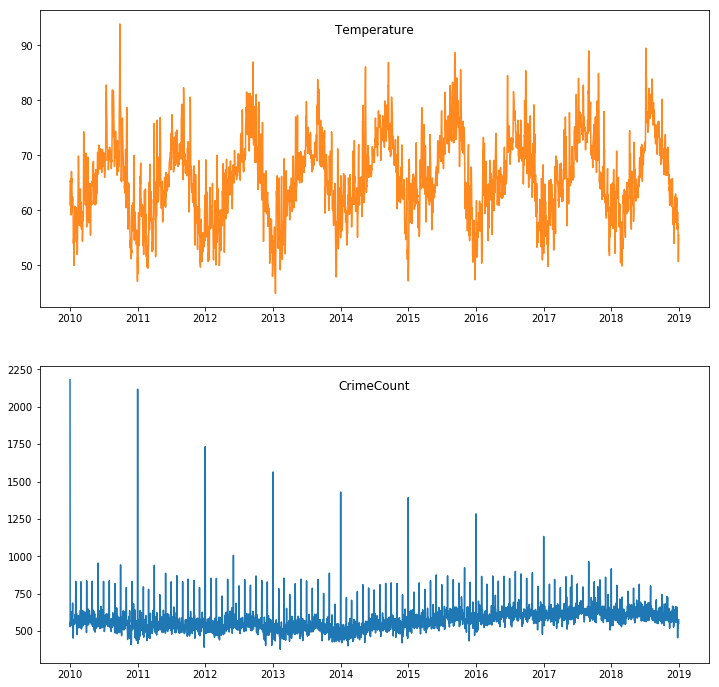

In [12]:
pyplot.figure(figsize=(12,12))

pyplot.subplot(2, 1, 1)
pyplot.plot(dfCrimeFinal[['Temperature']], color='#ff881f')
pyplot.title(dfCrimeFinal.columns[1], y=0.9, loc='center')

pyplot.subplot(2, 1, 2)
pyplot.plot(dfCrimeFinal[['CrimeCount']])
pyplot.title(dfCrimeFinal.columns[0], y=0.9, loc='center')

pyplot.show()

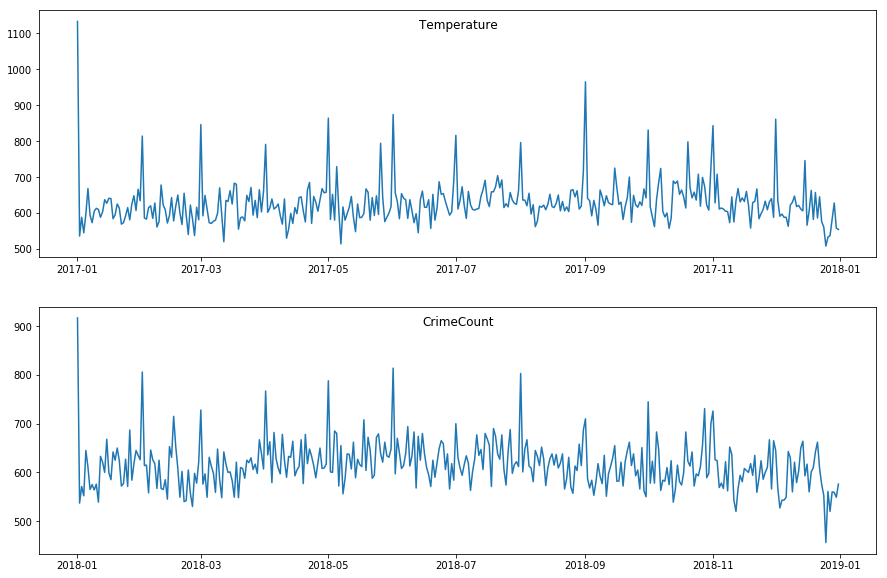

In [23]:
pyplot.figure(figsize=(15,10))

pyplot.subplot(2, 1, 1)
pyplot.plot(dfCrimeFinal.loc[pd.Timestamp('2017-01-01'):pd.Timestamp('2017-12-31')][['CrimeCount']])
pyplot.title(dfCrimeFinal.columns[1], y=0.9, loc='center')

pyplot.subplot(2, 1, 2)
pyplot.plot(dfCrimeFinal.loc[pd.Timestamp('2018-01-01'):][['CrimeCount']])
pyplot.title(dfCrimeFinal.columns[0], y=0.9, loc='center')

pyplot.show()

There is high volume of crime reported on specific dates. Get the dates where crime is more than 1100

In [10]:
dfCrimeFinal[dfCrimeFinal.CrimeCount > 1100]

,CrimeCount,Temperature
CrimeDate,,
2010-01-01,2180,61.0
2011-01-01,2117,51.4
2012-01-01,1733,62.8
2013-01-01,1564,51.2
2014-01-01,1430,55.0
2015-01-01,1393,47.2
2016-01-01,1284,53.8
2017-01-01,1133,52.2


The high volume of crimes are reported on new year day of every year and there is no news for the reason of sudden spike in crimes.
Verifying the crime numbers during the last week of each year shows that there are enough crimes recorded and the spike on new year day is not the consolidation of crimes in last week of the year. It could be the crimes reported in the new year celebration.

In [29]:
print(dfCrimeFinal.iloc[2182:2191])
print(dfCrimeFinal.iloc[2548:2557])
print(dfCrimeFinal.iloc[2913:2922])
print(dfCrimeFinal.iloc[3278:3287])

,CrimeCount,Temperature
CrimeDate,,
2018-12-23,575,56.6
2018-12-24,553,59.3
2018-12-25,456,59.7
2018-12-26,561,56.8
2018-12-27,520,57.5
2018-12-28,560,55.0
2018-12-29,559,50.7
2018-12-30,549,53.9
2018-12-31,576,55.5


In [30]:
# Get top crime type on the new year day of 2010
dfTmp = dfCrime.loc['2010-01-01':'2010-01-01']
dfTmp2 = dfTmp.groupby(["Crime.Type"]).size().reset_index(name="CrimeCount")
dfTmp2.sort_values(by=['CrimeCount'], inplace=True, ascending=False)
dfTmp2.head()

,Crime.Type,CrimeCount
17,IDENTITY THEFT,1012
6,CHILD ABUSE,251
35,THEFT,146
1,BATTERY,131
5,BURGLARY,114


In [31]:
# Get top crime type on the new year day of 2011
dfTmp = dfCrime.loc['2011-01-01':'2011-01-01']
dfTmp2 = dfTmp.groupby(["Crime.Type"]).size().reset_index(name="CrimeCount")
dfTmp2.sort_values(by=['CrimeCount'], inplace=True, ascending=False)
dfTmp2.head()

,Crime.Type,CrimeCount
17,IDENTITY THEFT,1063
8,CHILD ABUSE,184
34,THEFT,119
30,SEXUAL ABUSE,108
2,BATTERY,103


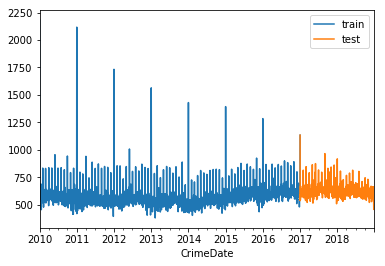

In [13]:
# Split the dataset for univariate time series forecast and plot them
dfCrimeOnly = dfCrimeFinal.copy()
dfCrimeOnly.drop(dfCrimeOnly.columns[[1]], axis=1, inplace=True)

split_date = pd.Timestamp('2017-01-01')
train = dfCrimeOnly.loc[:split_date]
test = dfCrimeOnly.loc[split_date:]

pyplot.figure(figsize=(15,10))
ax = train.plot()
test.plot(ax=ax)
pyplot.legend(['train', 'test'])

In [14]:
# Scale them down for to the range 0 to 1 for neural network to perform better
mmsc_uv = MinMaxScaler(feature_range=(0, 1))
train_uv = mmsc_uv.fit_transform(train.values.reshape(-1, 1))
test_uv = mmsc_uv.fit_transform(test.values.reshape(-1, 1))

X_train_uv = train_uv[:-1]
y_train_uv = train_uv[1:]
X_test_uv = test_uv[:-1]
y_test_uv = test_uv[1:]

print(X_train_uv[:5])
print(X_test_uv[:5])

[[1.        ]
 [0.08384231]
 [0.094392  ]
 [0.10216546]
 [0.08995003]]
[[1.        ]
 [0.11816839]
 [0.19497784]
 [0.13146233]
 [0.20827179]]


c:\users\sgobi\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
# Create the neural network model
uv_model = Sequential()
uv_model.add(Dense(50, input_dim=1))
uv_model.add(Dense(1))
uv_model.compile(loss='mse', optimizer='adam')

# train the model
uv_model.fit(X_train_uv, y_train_uv, epochs=50, batch_size=60, verbose=2, shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 0s - loss: 0.0039
Epoch 2/50
 - 0s - loss: 0.0026
Epoch 3/50
 - 0s - loss: 0.0025
Epoch 4/50
 - 0s - loss: 0.0025
Epoch 5/50
 - 0s - loss: 0.0024
Epoch 6/50
 - 0s - loss: 0.0024
Epoch 7/50
 - 0s - loss: 0.0024
Epoch 8/50
 - 0s - loss: 0.0024
Epoch 9/50
 - 0s - loss: 0.0024
Epoch 10/50
 - 0s - loss: 0.0024
Epoch 11/50
 - 0s - loss: 0.0024
Epoch 12/50
 - 0s - loss: 0.0024
Epoch 13/50
 - 0s - loss: 0.0024
Epoch 14/50
 - 0s - loss: 0.0024
Epoch 15/50
 - 0s - loss: 0.0024
Epoch 16/50
 - 0s - loss: 0.0025
Epoch 17/50
 - 0s - loss: 0.0025
Epoch 18/50
 - 0s - loss: 0.0025
Epoch 19/50
 - 0s - loss: 0.0025
Epoch 20/50
 - 0s - loss: 0.0025
Epoch 21/50
 - 0s - loss: 0.0025
Epoch 22/50
 - 0s - loss: 0.0025
Epoch 23/50
 - 0s - loss: 0.0026
Epoch 24/50
 - 0s - loss: 0.0026
Epoch 25/50
 - 0s - loss: 0.0026
Epoch 26/50
 - 0s - loss: 0.0026
Epoch 27/50
 - 0s - loss: 0.002

In [16]:
# Make a prediction
forecast_uv = uv_model.predict(X_test_uv)

actual_uv = mmsc_uv.inverse_transform(y_test_uv)
forecast_uv = mmsc_uv.inverse_transform(forecast_uv)
forecast_uv = forecast_uv[:,0].round(0)

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_uv, forecast_uv))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 94.832


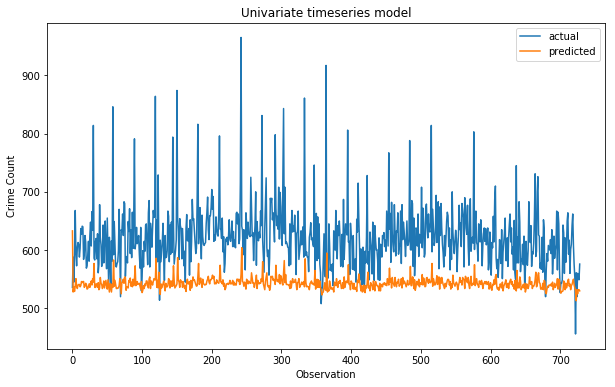

In [17]:
pyplot.figure(figsize=(10, 6))
pyplot.plot(actual_uv, label='actual')
pyplot.plot(forecast_uv, label='predicted')
pyplot.title("Univariate timeseries model")
pyplot.xlabel('Observation')
pyplot.ylabel('Crime Count')
pyplot.legend()
pyplot.show()

Now the data is prepared for analysis, next step is to prepare it for feeding it to Neural Networks for trainig the model.

1. Get the data values as pandas series and convert them to float data type.
2. Neural Networks can not perform well with the input values outside the range of -1 and 1, therefore use MinMaxScaler to scale the values down between 0 to 1 for the model to perform best.
3. Apply shift and lagging for the time series analysis

In [18]:
# Get the data of python series from the data frame
values = dfCrimeFinal.values

# Convert the values to float data type
values = values.astype('float32')

# scale down the feature values
mmsc_mv = MinMaxScaler(feature_range=(0, 1))
scaled = mmsc_mv.fit_transform(values)

# Appy shift for the input column values
dfScaled = DataFrame(scaled)
dfCopy = dfScaled.copy()
shifted = dfScaled
for Cnt in range(2):
    shifted = pd.concat([shifted, dfCopy.shift(-(Cnt+1))], axis=1)

shifted.dropna(inplace=True, axis=0)
shifted.columns = ['feature1(t-2)', 'feature2(t-2)', 'feature1(t-1)', 'feature2(t-1)', 'feature1(t)', 'feature2(t)']

# drop the temperature column from the output as prediction is only for the crime count
shifted.drop(shifted.columns[[-1]], axis=1, inplace=True)
print(shifted.head())
print(shifted.shape)

   feature1(t-2)  feature2(t-2)  feature1(t-1)  feature2(t-1)  feature1(t)
0       1.000000       0.328571       0.083842       0.418367     0.094392
1       0.083842       0.418367       0.094392       0.416327     0.102165
2       0.094392       0.416327       0.102165       0.414286     0.089950
3       0.102165       0.414286       0.089950       0.424490     0.088284
4       0.089950       0.424490       0.088284       0.391837     0.093282
(3285, 5)


Split the dataset into train and test sets

In [19]:
# get the series data from data frame
values = shifted.values

# Take the training data for first 7 years from 2010 to 2016
train_days = int(len(values) - (365*2))
train = values[:train_days, :]
test = values[train_days:, :]

# split into input and outputs
train_in, train_out = train[:, :-1], train[:, -1]
test_in, test_out = test[:, :-1], test[:, -1]

# reshape input to be 3D as Neural network take inputs in 3D [samples, timesteps, features]
train_in = train_in.reshape((train_in.shape[0], 1, train_in.shape[1]))
test_in = test_in.reshape((test_in.shape[0], 1, test_in.shape[1]))

print(train_in.shape, train_out.shape, test_in.shape, test_out.shape)

(2555, 1, 4) (2555,) (730, 1, 4) (730,)


Create the Long Short Term Memory(LSTM) neural network model and train it with the input training data

In [27]:
# Create the neural network model
nn_model = Sequential()
nn_model.add(LSTM(40, input_shape=(train_in.shape[1], train_in.shape[2])))
nn_model.add(Dense(1))
nn_model.compile(loss='mse', optimizer='adam')

# train the model
nn_model.fit(train_in, train_out, epochs=50, batch_size=60, validation_data=(test_in, test_out), verbose=2, shuffle=False)

Train on 2555 samples, validate on 730 samples
Epoch 1/50
 - 2s - loss: 0.0043 - val_loss: 0.0014
Epoch 2/50
 - 0s - loss: 0.0026 - val_loss: 0.0017
Epoch 3/50
 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 4/50
 - 0s - loss: 0.0026 - val_loss: 0.0016
Epoch 5/50
 - 0s - loss: 0.0026 - val_loss: 0.0015
Epoch 6/50
 - 0s - loss: 0.0026 - val_loss: 0.0015
Epoch 7/50
 - 0s - loss: 0.0026 - val_loss: 0.0015
Epoch 8/50
 - 0s - loss: 0.0026 - val_loss: 0.0015
Epoch 9/50
 - 0s - loss: 0.0026 - val_loss: 0.0015
Epoch 10/50
 - 0s - loss: 0.0026 - val_loss: 0.0015
Epoch 11/50
 - 0s - loss: 0.0026 - val_loss: 0.0015
Epoch 12/50
 - 0s - loss: 0.0026 - val_loss: 0.0015
Epoch 13/50
 - 0s - loss: 0.0025 - val_loss: 0.0015
Epoch 14/50
 - 0s - loss: 0.0025 - val_loss: 0.0015
Epoch 15/50
 - 0s - loss: 0.0025 - val_loss: 0.0015
Epoch 16/50
 - 0s - loss: 0.0025 - val_loss: 0.0015
Epoch 17/50
 - 0s - loss: 0.0025 - val_loss: 0.0015
Epoch 18/50
 - 0s - loss: 0.0025 - val_loss: 0.0015
Epoch 19/50
 - 0s - loss: 

Make a forecast for the test input value.
The values are scaled down to the range of 0 to 1. inverse them up back to normal range of crime count

Evaluate the model with the Root Mean Square Error (RMSE) value

In [28]:
# make a prediction from the input test data set
scaled_forecast = nn_model.predict(test_in)

# revert the scaling of forecast values back to normal value range
test_in_rsd = test_in.reshape((test_in.shape[0], test_in.shape[2]))
forecast = concatenate((scaled_forecast, test_in_rsd[:, -1:]), axis=1)
forecast = mmsc_mv.inverse_transform(forecast)
forecast = forecast[:,0].round(0)

# revert the scaling of actula test values back to normal value range
test_out_rsd = test_out.reshape((len(test_out), 1))
actual_test = concatenate((test_out_rsd, test_in_rsd[:, -1:]), axis=1)
actual_test = mmsc_mv.inverse_transform(actual_test)
actual_test = actual_test[:,0].round(0)

# calculate RMSE
rmse = sqrt(mean_squared_error(actual_test, forecast))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 73.502


Get the value of number of crimes for last 10 days

In [29]:
print(actual_test[-10:])
print(forecast[-10:])

print(dfCrimeFinal.iloc[3277:])

[608. 575. 553. 456. 561. 520. 560. 559. 549. 576.]
[571. 564. 553. 550. 540. 543. 544. 543. 539. 540.]
            CrimeCount  Temperature
CrimeDate                          
2018-12-22         608         60.0
2018-12-23         575         56.6
2018-12-24         553         59.3
2018-12-25         456         59.7
2018-12-26         561         56.8
2018-12-27         520         57.5
2018-12-28         560         55.0
2018-12-29         559         50.7
2018-12-30         549         53.9
2018-12-31         576         55.5


Create a data frame with the actual test values and forecast values for plotting

In [30]:
dfFC = dfCrimeFinal.copy()
dfFC = dfFC.iloc[2557:]
dfFC['CrimePredicted'] = forecast
print(dfFC.head())

            CrimeCount  Temperature  CrimePredicted
CrimeDate                                          
2017-01-01        1133         52.2           550.0
2017-01-02         536         54.5           600.0
2017-01-03         588         53.5           571.0
2017-01-04         545         55.0           544.0
2017-01-05         597         60.0           544.0


Plot the comparison of actual crime and predicted crime count for the test data period (2017 and 2018)

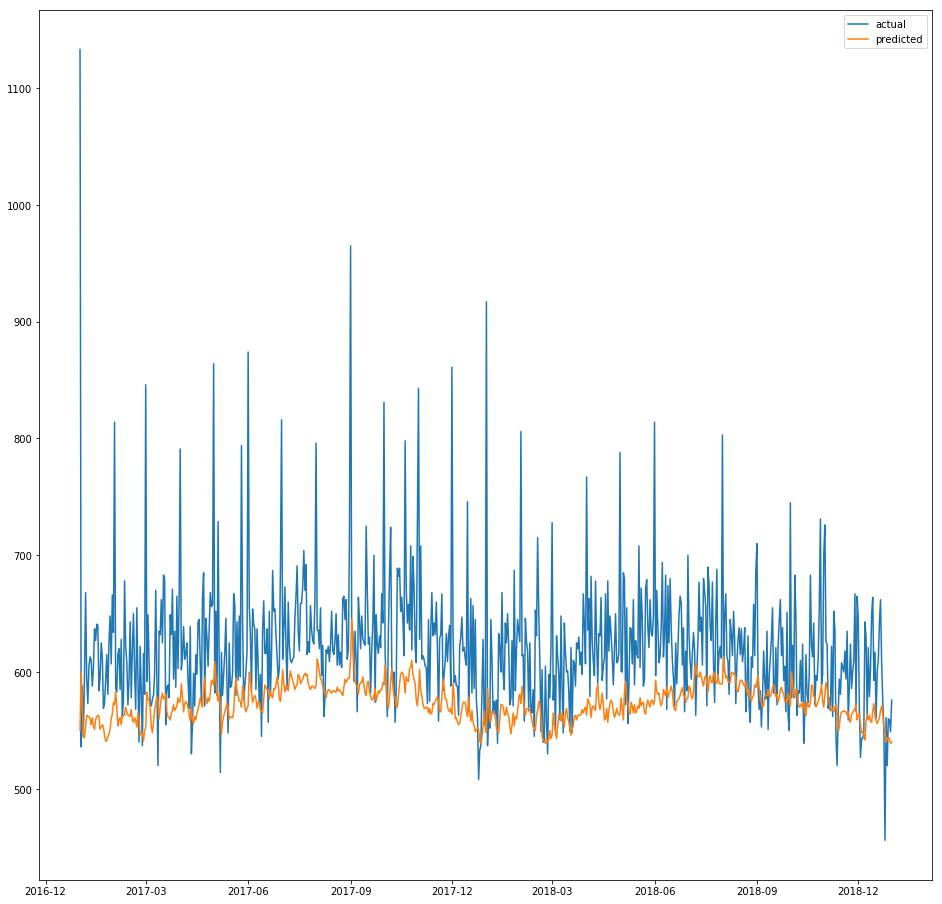

In [31]:
pyplot.figure(figsize=(16,16))
pyplot.plot(dfFC['CrimeCount'], label='actual')
pyplot.plot(dfFC['CrimePredicted'], label='predicted')
pyplot.legend(loc = 'upper right')
pyplot.show()

Plot the comparison of actual crime and predicted crime count for the last 3 months of test data period (Oct, Nov and Dec 2018)

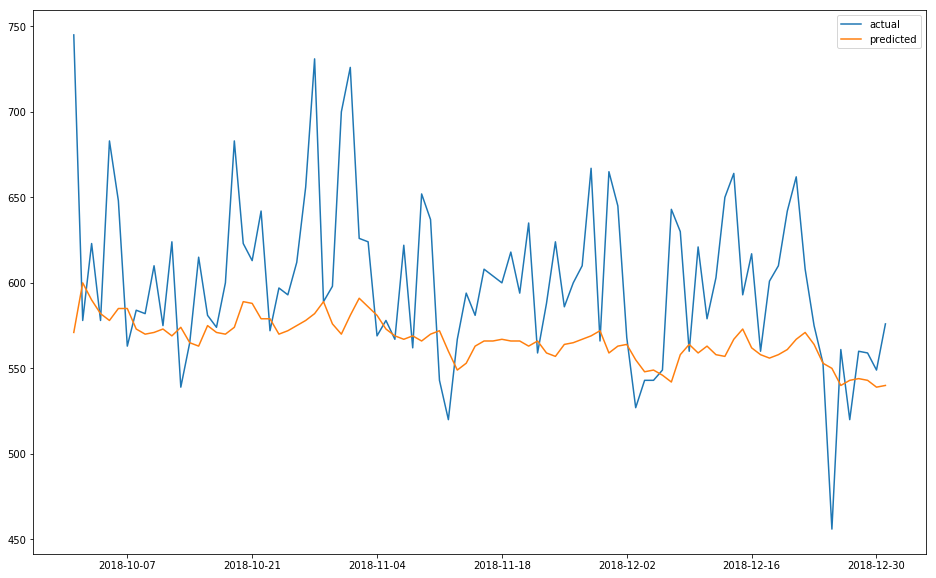

In [32]:
pyplot.figure(figsize=(16,10))
pyplot.plot(dfFC.iloc[638:]['CrimeCount'], label='actual')
pyplot.plot(dfFC.iloc[638:]['CrimePredicted'], label='predicted')
pyplot.legend(loc = 'upper right')
pyplot.show()

Create input values at scaled range for predicting the future crime count in the month of Jan 2019

In [33]:
dfFuture = dfCrimeFinal.iloc[2922:2954]
dfFuture = pd.concat([dfFuture, dfFuture.copy().shift(-1)], axis=1)
dfFuture.dropna(inplace=True, axis=0)

X_test = dfFuture.values
X_test = X_test.astype('float32')
X_test = mmsc_mv.fit_transform(X_test)
X_test = X_test.reshape(31, 1, 4)
print(X_test[:5])

[[[1.         0.27956986 0.         0.57526875]]

 [[0.         0.57526875 0.12639415 0.6451609 ]]

 [[0.08947372 0.6451609  0.05576217 0.6129031 ]]

 [[0.03947365 0.6129031  0.401487   0.59139776]]

 [[0.28421056 0.59139776 0.27509296 0.5161288 ]]]


Create input values at scaled range for predicting the future crime count in the month of Jan 2019

In [34]:
futureVals = nn_model.predict(X_test)

XX_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
JanForecast = concatenate((futureVals, XX_test[:, -3:]), axis=1)
JanForecast = mmsc_mv.inverse_transform(JanForecast)
JanForecast = JanForecast[:,0].round(0)
JanForecast

array([590., 578., 577., 589., 588., 581., 580., 574., 574., 570., 583.,
       592., 590., 594., 587., 583., 591., 589., 588., 582., 574., 577.,
       587., 578., 590., 584., 587., 596., 598., 593., 612.],
      dtype=float32)

Plot the predicted values, Number of crimes againt the date.

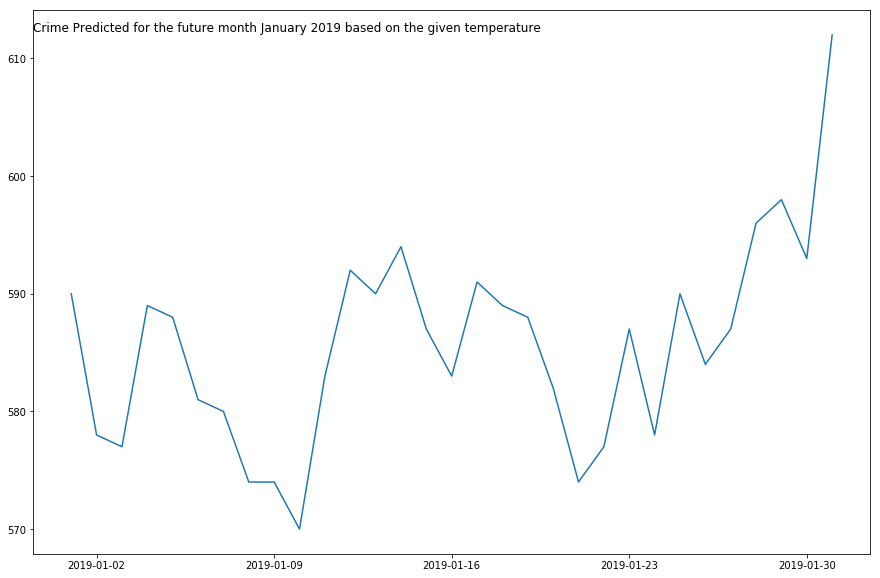

In [36]:
date_future = []
for i in range(31):
    date_future.append(date(2019, 1, 1) + timedelta(i))
    
# Create data frame 
dfPredFuture = pd.DataFrame({'CrimeDate':date_future, 'CrimeCount':JanForecast} )
dfPredFuture.set_index('CrimeDate', inplace=True, drop=True)

pyplot.figure(figsize=(15,10))
pyplot.plot(dfPredFuture[['CrimeCount']])
pyplot.title("Crime Predicted for the future month January 2019 based on the given temperature", y=0.95, loc='left')
pyplot.show()

In [37]:
# Perform t test hypothesis testing between the univariate model and multi variate model
stats.ttest_ind(forecast_uv,forecast, equal_var = False)

Ttest_indResult(statistic=-46.18353189460189, pvalue=2.193918472435052e-273)